In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data = pd.read_csv('/Users/rjpathak/Downloads/Online+Retail.csv', sep = ',', encoding = 'ISO-8859-1', header = 0)

In [142]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [143]:
data.shape

(541909, 8)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [145]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [146]:
round(100*(data.isnull().sum()/len(data)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [147]:
data = data.dropna()

In [148]:
round(100*(data.isnull().sum()/len(data)),2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [149]:
data['Amount'] = data['Quantity']*data['UnitPrice']

In [150]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [151]:
df = data.groupby('CustomerID')['Amount'].sum()

In [152]:
df = df.reset_index()

In [153]:
df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [154]:
freq = data.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()


,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [155]:
group_df = pd.merge(df, freq, on = 'CustomerID', how = 'inner')

In [156]:
group_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [157]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format = '%d-%m-%Y %H:%M')

In [158]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [160]:
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [161]:
data['Diff'] = max_date - data['InvoiceDate']

In [162]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [163]:
last_p = data.groupby('CustomerID')['Diff'].min()

In [164]:
last_p = last_p.reset_index()
last_p.columns = ['CustomerID', 'Recency']

In [165]:
group_df = pd.merge(group_df, last_p, on = 'CustomerID', how = 'inner')

In [166]:
group_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [167]:
import datetime as dt

In [168]:
group_df['Recency'] = group_df['Recency'].dt.days

In [169]:
group_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<Axes: ylabel='Amount'>

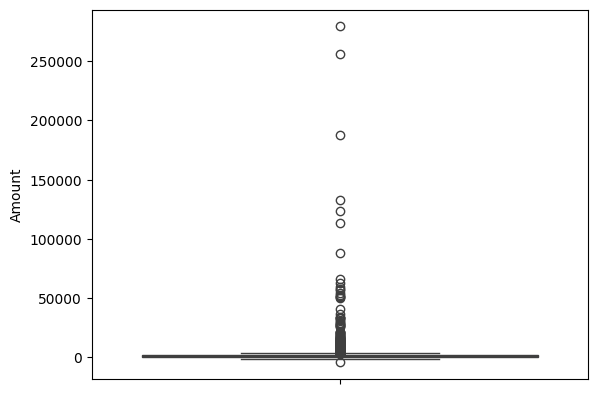

In [170]:
sns.boxplot(group_df['Amount'])

<Axes: ylabel='Frequency'>

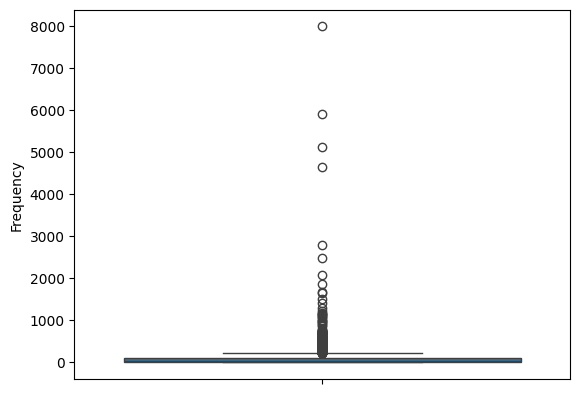

In [174]:
sns.boxplot(group_df['Frequency'])

<Axes: ylabel='Recency'>

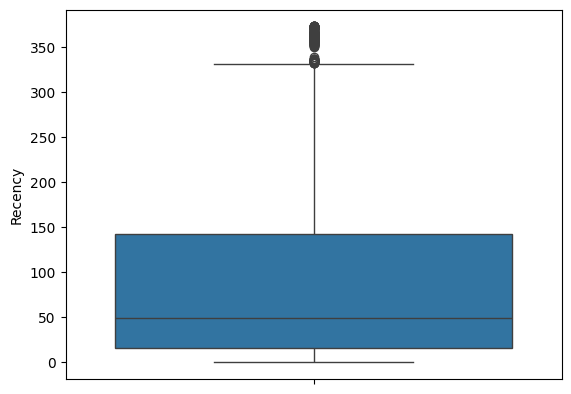

In [172]:
sns.boxplot(group_df['Recency'])

In [175]:
Q1 = group_df.Amount.quantile(0.05)
Q3 = group_df.Amount.quantile(0.95)
IQR = Q3-Q1
group_df = group_df[(group_df.Amount >= Q1 - 1.5*IQR) & (group_df.Amount <= Q3+ 1.5*IQR)]


Q1 = group_df.Frequency.quantile(0.05)
Q3 = group_df.Frequency.quantile(0.95)
IQR = Q3-Q1
group_df = group_df[(group_df.Frequency >= Q1 - 1.5*IQR) & (group_df.Frequency <= Q3+ 1.5*IQR)]


Q1 = group_df.Recency.quantile(0.05)
Q3 = group_df.Recency.quantile(0.95)
IQR = Q3-Q1
group_df = group_df[(group_df.Recency >= Q1 - 1.5*IQR) & (group_df.Recency <= Q3+ 1.5*IQR)]

In [176]:
rfm = group_df[['Amount', 'Frequency', 'Recency']]

In [177]:
rfm.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
rfm_df = scaler.fit_transform(rfm)

In [180]:
rfm_df.shape

(4293, 3)

In [181]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [182]:
rfm_df = pd.DataFrame(rfm_df)

In [183]:
rfm_df.columns = ['Amount', 'Frequency', 'Recency']

In [184]:
rfm_df.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [185]:
hopkins(rfm_df)

np.float64(0.9600138981075222)

In [186]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [187]:
kmeans = KMeans()
range_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_clusters:
    kmeans_1 = KMeans(n_clusters = num, max_iter = 50)
    kmeans_1.fit(rfm_df)
    cluster_labels = kmeans_1.labels_
    avg = silhouette_score(rfm_df, cluster_labels)
    print('for n_clusters ={0}, the silhouette_score is {1}'.format(num, avg))

for n_clusters =2, the silhouette_score is 0.5415858652525395
for n_clusters =3, the silhouette_score is 0.5085084004374336
for n_clusters =4, the silhouette_score is 0.4777820100216849
for n_clusters =5, the silhouette_score is 0.4642592405650611
for n_clusters =6, the silhouette_score is 0.42593226253381794
for n_clusters =7, the silhouette_score is 0.41399190745410075
for n_clusters =8, the silhouette_score is 0.3852148936893778


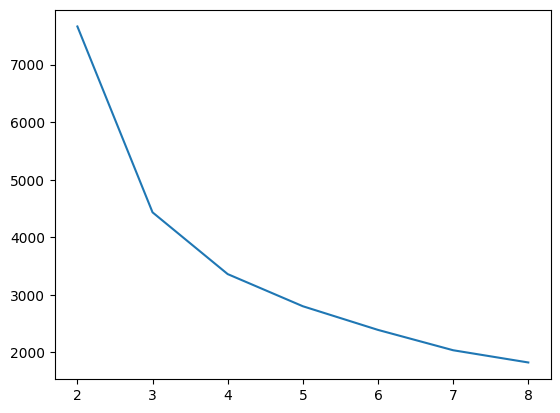

In [188]:
SSD = []
range_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_clusters:
    kmeans_1 = KMeans(n_clusters = num, max_iter = 50)
    kmeans_1.fit(rfm_df)
    SSD.append(kmeans_1.inertia_)
plt.plot(range_clusters, SSD)

In [189]:
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(rfm_df)
cluster_label = kmeans.labels_

In [191]:
group_df['Cluster_id'] = cluster_label

In [192]:
group_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='Cluster_id', ylabel='Amount'>

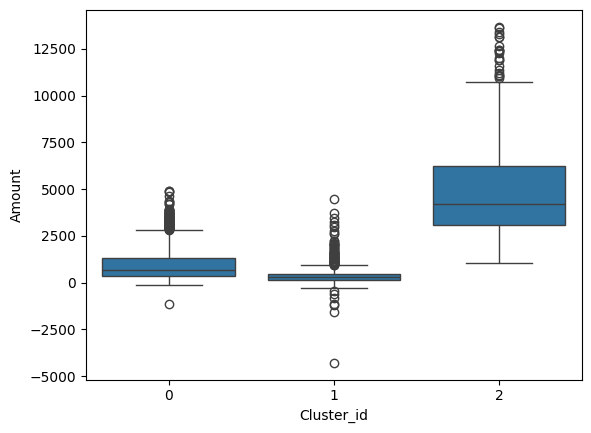

In [197]:
sns.boxplot(x = 'Cluster_id', y = 'Amount', data= group_df)

<Axes: xlabel='Cluster_id', ylabel='Frequency'>

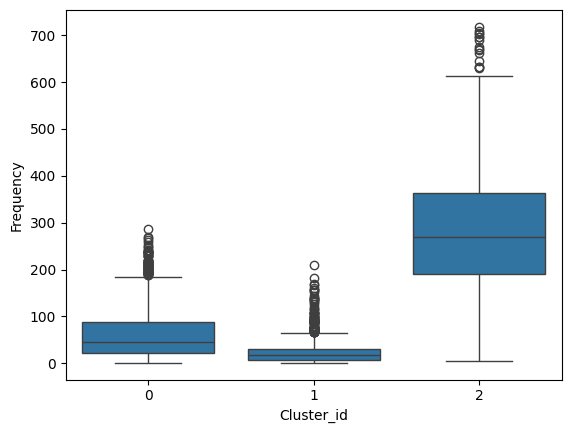

In [198]:
sns.boxplot(x = 'Cluster_id', y = 'Frequency', data= group_df)

<Axes: xlabel='Cluster_id', ylabel='Recency'>

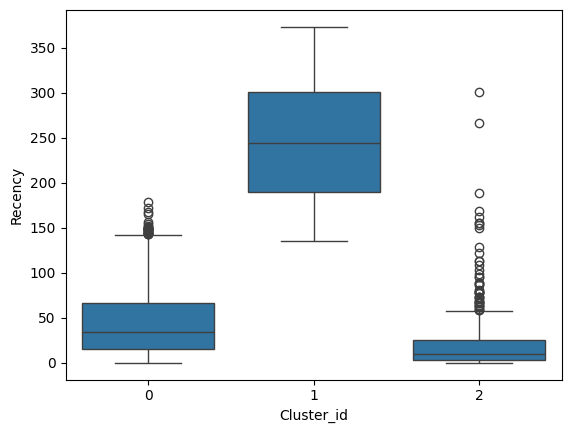

In [199]:
sns.boxplot(x = 'Cluster_id', y = 'Recency', data= group_df)